###### Needed packages are imported

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Data Reading and Exploration

###### Data is received from "https://www.kaggle.com/datasets/blastchar/telco-customer-churn". Data is read using pandas library

In [2]:
data=pd.read_csv('data.csv')

###### First 5 rows of the dataset is visualized to see the content of the data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### Data type of each feature is printed. As it can be seen, many of the features are categorical data

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

###### Only 3 features contain numerical data. Description of these features is printed, which includes parameters such as count, mean, std, etc.

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


###### Information regarding the dataset is printed. It is seen that 7043 rows are present. There are non null elements in the dataset and datatypes of each feature are present

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.duplicated().sum()

0

# Data Preprocessing

###### Using the .dropna() function, null data are dropped from the dataset. Even though, there are no null values in this dataset, normally null values should be either be dropped with this function or should be filled with various methods.

In [8]:
data.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

###### Using the function below, each unique categorical data for each figure are present. 

In [11]:
def print_unique_col_values(data):
    
    for column in data:
        if data[column].dtypes =='object':
            print(f'{column} : {data[column].unique()}')

            
print_unique_col_values(data)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


###### Customer ID is dropped since it is not useful in the machine learning models. 

In [12]:
data.drop("customerID", axis=1, inplace=True)

###### Categorical data present in the dataset are converted into numerical data by using .replace() function and by creating dummies

In [13]:
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)
dfEncoded=data
dfEncoded=pd.get_dummies(dfEncoded, columns=["InternetService"], prefix=['InternetService_is'])
dfEncoded=pd.get_dummies(dfEncoded, columns=["Contract"], prefix=['Contract_is'])
dfEncoded=pd.get_dummies(dfEncoded, columns=["PaymentMethod"], prefix=['PaymentMethod_is'])
dfEncoded.replace(('Yes', 'No'), (1, 0), inplace=True)
dfEncoded.replace(('Female', 'Male'), (1, 0), inplace=True)
dfEncoded.TotalCharges = pd.to_numeric(dfEncoded.TotalCharges, errors = 'coerce')

In [14]:
dfEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gender                                      7043 non-null   int64  
 1   SeniorCitizen                               7043 non-null   int64  
 2   Partner                                     7043 non-null   int64  
 3   Dependents                                  7043 non-null   int64  
 4   tenure                                      7043 non-null   int64  
 5   PhoneService                                7043 non-null   int64  
 6   MultipleLines                               7043 non-null   int64  
 7   OnlineSecurity                              7043 non-null   int64  
 8   OnlineBackup                                7043 non-null   int64  
 9   DeviceProtection                            7043 non-null   int64  
 10  TechSupport 

In [15]:
dfEncoded.isnull().sum()

gender                                         0
SeniorCitizen                                  0
Partner                                        0
Dependents                                     0
tenure                                         0
PhoneService                                   0
MultipleLines                                  0
OnlineSecurity                                 0
OnlineBackup                                   0
DeviceProtection                               0
TechSupport                                    0
StreamingTV                                    0
StreamingMovies                                0
PaperlessBilling                               0
MonthlyCharges                                 0
TotalCharges                                  11
Churn                                          0
InternetService_is_DSL                         0
InternetService_is_Fiber optic                 0
InternetService_is_No                          0
Contract_is_Month-to

In [16]:
dfEncoded= dfEncoded.dropna()

###### As it can be seen from the dataset below, there are none categorical values left in the dataset

In [17]:
dfEncoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


###### Dataset is scaled, so that each value is between 0 and 1.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaled = scaler.fit_transform(dfEncoded)

# Data Visualization

###### Correlation matrix of the dataset is created to be able to observe the effect of each feature on other features. As it can be seen in the correlation matrix, "Contract Type", "Internet Service" and "Tenure" are the most correlated features with "Churn". Also, "Gender" is the least correlated feature.

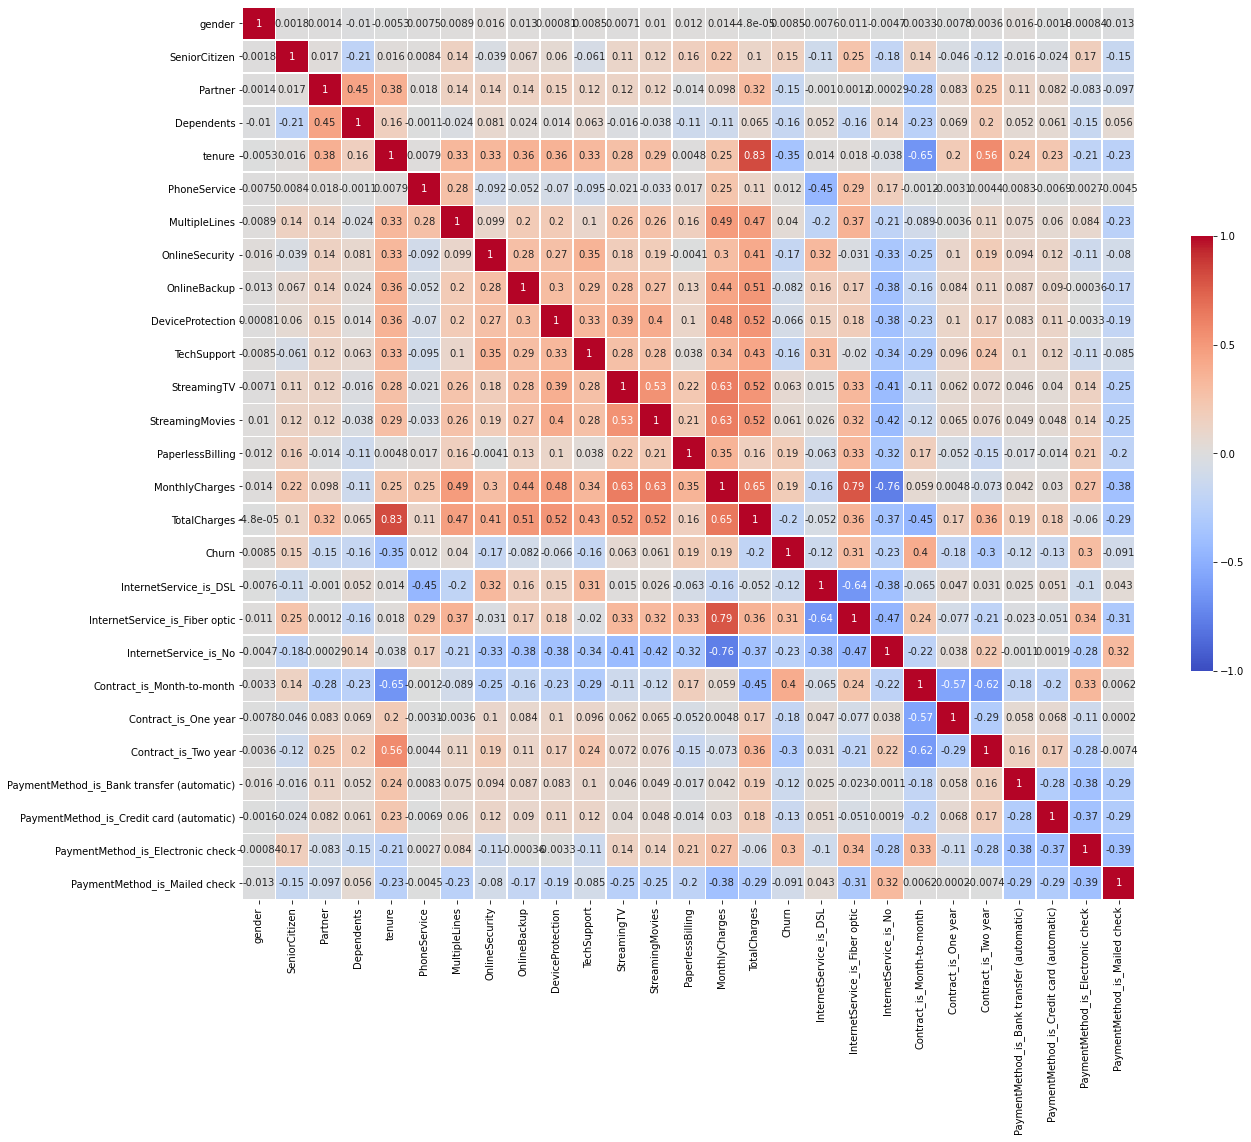

In [19]:
df_corr = dfEncoded.copy()
Corr_mat_columns = df_corr.columns.tolist()
corr_matrix = df_corr.corr()

f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(corr_matrix,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [20]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

###### Since "Contract" has high correlation with "Churn", this data is visualized. As the bar plot shows, customers with month-to-month contract are prone to churning more than other customers with different contract types.

<ipython-input-21-a6d5629f4704>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  M2M_count_CY = data_ChurnYes[data['Contract'] == 'Month-to-month'].count()[0]
<ipython-input-21-a6d5629f4704>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  M2M_count_CN = data_ChurnNo[data['Contract'] == 'Month-to-month'].count()[0]
<ipython-input-21-a6d5629f4704>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  OY_count_CY = data_ChurnYes[data['Contract'] == 'One year'].count()[0]
<ipython-input-21-a6d5629f4704>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  OY_count_CN = data_ChurnNo[data['Contract'] == 'One year'].count()[0]
<ipython-input-21-a6d5629f4704>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TY_count_CY = data_ChurnYes[data['Contract'] == 'Two year'].count()[0]
<ipython-input-21-a6d5629f4704>:8: UserWarning: Boolean Series key w

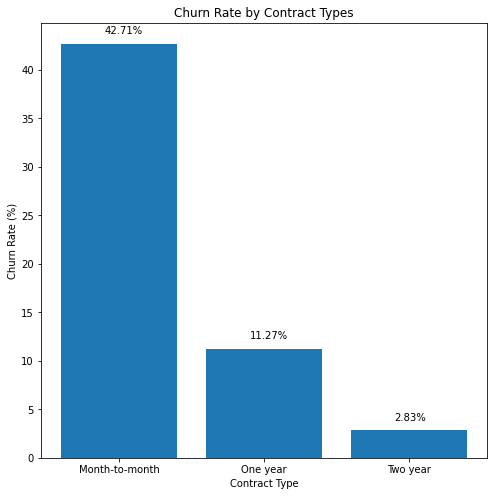

In [21]:
data_ChurnYes = data[data['Churn'] == 'Yes']
data_ChurnNo = data[data['Churn'] == 'No']
M2M_count_CY = data_ChurnYes[data['Contract'] == 'Month-to-month'].count()[0]
M2M_count_CN = data_ChurnNo[data['Contract'] == 'Month-to-month'].count()[0]
OY_count_CY = data_ChurnYes[data['Contract'] == 'One year'].count()[0]
OY_count_CN = data_ChurnNo[data['Contract'] == 'One year'].count()[0]
TY_count_CY = data_ChurnYes[data['Contract'] == 'Two year'].count()[0]
TY_count_CN = data_ChurnNo[data['Contract'] == 'Two year'].count()[0]

M2M_ChurnRate = M2M_count_CY/(M2M_count_CN+M2M_count_CY)*100
OY_ChurnRate = OY_count_CY/(OY_count_CN+OY_count_CY)*100
TY_ChurnRate = TY_count_CY/(TY_count_CN+TY_count_CY)*100



labels = ['Month-to-month', 'One year', 'Two year']
Contract_Churnrate = [M2M_ChurnRate, OY_ChurnRate, TY_ChurnRate]


fig, ax = plt.subplots(figsize=(8, 8))
plt.bar(labels, Contract_Churnrate)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Churn Rate (%)')
plt.xlabel("Contract Type")
ax.set_title('Churn Rate by Contract Types')

for i in range(3):
    plt.text(x=i-0.1 , y = Contract_Churnrate[i] + 1 , s=f"{'%.2f' % Contract_Churnrate[i]}" + '%' , fontdict=dict(fontsize=10))

plt.show()

In [22]:
data_ChurnYes['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

###### As the pie chart on the left indicate, customers, who churned, are mostly using fiber optic internet service, whereas customers, who did not churn, have close internet service type rates

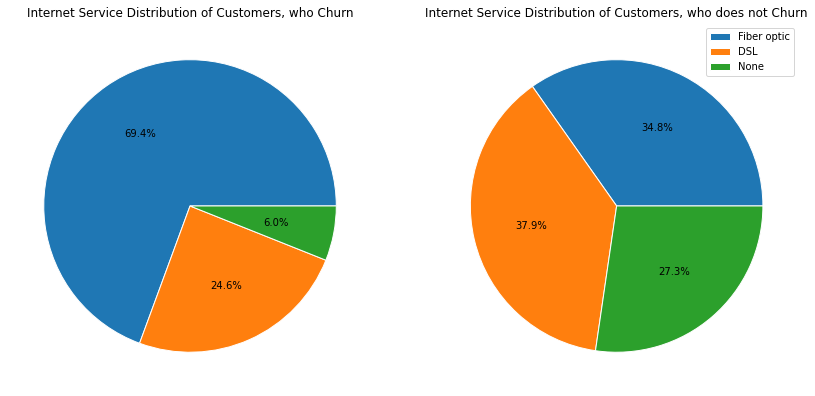

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))
label = ['Fiber optic', 'DSL', 'None']
axes[0].pie(data_ChurnYes['InternetService'].value_counts().loc[['Fiber optic', 'DSL', 'No']], 
       autopct = '%1.1f%%', radius=1, center=(1,1),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)

axes[1].pie(data_ChurnNo['InternetService'].value_counts().loc[['Fiber optic', 'DSL', 'No']], 
       autopct = '%1.1f%%', radius=1, center=(1, 1),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)

axes[0].set_title('Internet Service Distribution of Customers, who Churn')
axes[1].set_title('Internet Service Distribution of Customers, who does not Churn')

plt.legend(label, loc="upper right")

fig.tight_layout()

In [ ]:
data_ChurnYes['tenure'].unique()
tenure_list_ChurnYes = [2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72]
tenure_list_ChurnYes.sort()


data_ChurnNo['tenure'].unique()
tenure_list_ChurnNo = [ 1, 34, 45, 22, 10, 62, 13, 16, 58, 25, 69, 52, 71, 21, 12, 49, 30,
       72,  2, 27, 46, 70, 17, 63, 43, 60, 66, 47, 18,  3, 31, 50, 64, 56,
        8, 11, 42,  9, 35, 48, 29, 65, 38,  5, 32, 36, 41,  6,  7,  4, 33,
       67, 23, 57, 61, 15, 14, 53, 20, 40, 59, 24, 44, 54, 51, 19, 68, 28,
       37, 55, 26,  0, 39]
tenure_list_ChurnNo.sort()

###### Histogram plot of tenure based on the customers, who churned, is present below. It is seen that customers with less tenure tend to churn more.

Text(0.5, 1.0, 'Distribution of customer counts, who Churn, based on tenure')

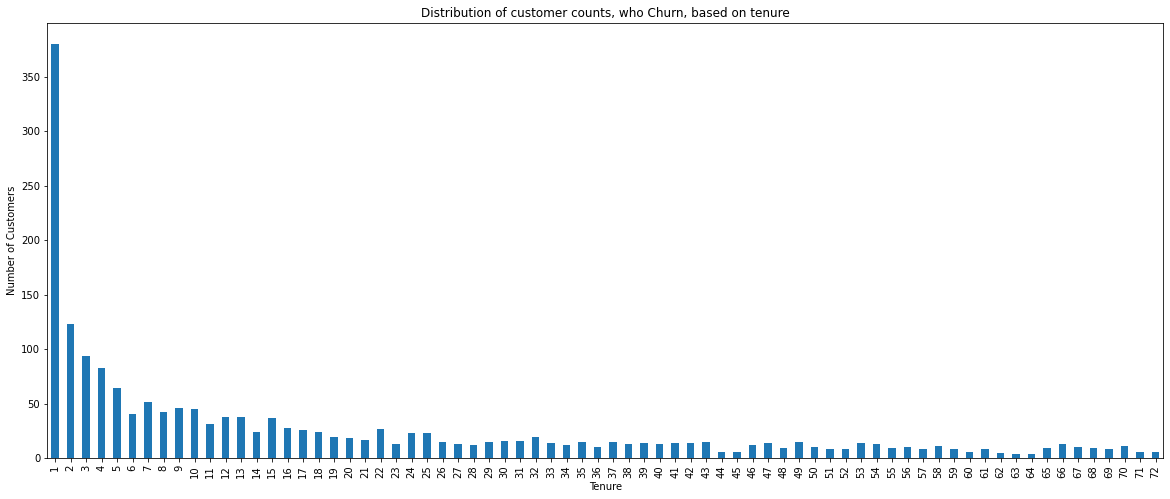

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
data_ChurnYes['tenure'].value_counts().loc[tenure_list_ChurnYes].plot.bar()

ax.set_ylabel('Number of Customers')
plt.xlabel("Tenure")
ax.set_title('Distribution of customer counts, who Churn, based on tenure')

###### Histogram plot of tenure based on the customers, who did not churn, is present below. It is seen that there are more customers with high tenure in this distribution compared with the previous histogram

Text(0.5, 1.0, 'Distribution of customer counts, who does not Churn, based on tenure')

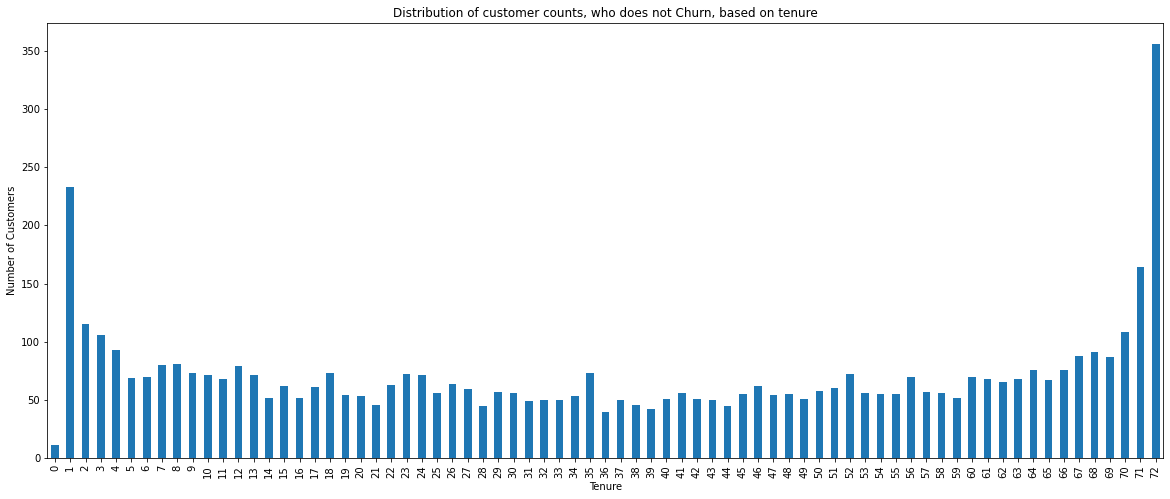

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
data_ChurnNo['tenure'].value_counts().loc[tenure_list_ChurnNo].plot.bar()

ax.set_ylabel('Number of Customers')
plt.xlabel("Tenure")
ax.set_title('Distribution of customer counts, who does not Churn, based on tenure')

# Model Application and Selection

In [27]:
df=dfEncoded.copy()

###### X and Y datasets are created to be used in the machine learning models

In [28]:
y = df.Churn  # Target variable
X = df.drop("Churn", axis=1) # Features

###### Test and train sets are created

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Logistic Regression

###### Logistic regression model is created and performance measure results are appended into the newly created dataframe

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()                                  #model is created
logreg.fit(X_train,y_train)                                    #model is trained
logreg_pred=logreg.predict(X_test)                             #prediction is done

#results of performance measures are extracted

acc = accuracy_score(y_test, logreg_pred )
prec = precision_score(y_test, logreg_pred )
rec = recall_score(y_test, logreg_pred )
f1 = f1_score(y_test, logreg_pred )

#A dataframe is created to append all performance measure results of each model

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.808874,0.645669,0.550336,0.594203


### XGboost 

###### XGboost model is created and performance measure results are appended into the created dataframe

In [31]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
xgb_pred= xgboost_model.predict(X_test)

acc = accuracy_score(y_test, xgb_pred )
prec = precision_score(y_test, xgb_pred )
rec = recall_score(y_test, xgb_pred )
f1 = f1_score(y_test, xgb_pred )

model_results = pd.DataFrame([['XGboost', acc, prec, rec, f1]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.808874,0.645669,0.550336,0.594203
1,XGboost,0.806598,0.650704,0.516779,0.576060


### Grid Search Cv Hyperparameter Optimization for XGboost

###### To be able to increase the performance of XGboost model, hyperparameter tuning is done. Grid Search is used in this stage. 

In [27]:
parameters = {
        'n_estimators': [100,250, 500],
        'subsample': [0.6, 0.8, 1.0], 
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1,0.3, 0.5]}

#parameters used in hyperparamer tuning of XGboost and their values

xgboost_cv = GridSearchCV(xgboost_model, parameters, cv = 9, n_jobs = -1, verbose = 2)
xgboost_cv.fit(X_train, y_train)

best = xgboost_cv.best_params_
best

#Result of hyperparameter tuning gives the the best architecture considering the parameters and their values 
#given into the grid search algorithm

Fitting 9 folds for each of 243 candidates, totalling 2187 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 2187 out of 2187 | elapsed: 24.4min finished


{'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.6}

### XGboost (Tuned)

###### Tuned XGboost model is created and performance measure results are appended into the created dataframe. The model is created with the best architecture, which is acquired through hyperparameter tuning

In [32]:
xgboost = XGBClassifier(gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100,subsample=0.6)
xgb_tuned =  xgboost.fit(X_train,y_train)

In [33]:
xgboosttuned_pred=xgboost.predict(X_test)

acc = accuracy_score(y_test, xgboosttuned_pred )
prec = precision_score(y_test, xgboosttuned_pred )
rec = recall_score(y_test, xgboosttuned_pred )
f1 = f1_score(y_test, xgboosttuned_pred )

model_results = pd.DataFrame([['XGboost (Tuned)', acc, prec, rec, f1]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.808874,0.645669,0.550336,0.594203
1,XGboost,0.806598,0.650704,0.516779,0.576060
2,XGboost (Tuned),0.809443,0.653846,0.532438,0.586930


### Gradient Boosting

###### Gradient Boosting model is created and performance measure results are appended into the created dataframe

In [34]:
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, y_train)
grad_pred=grad_model.predict(X_test)

acc = accuracy_score(y_test, grad_pred )
prec = precision_score(y_test, grad_pred )
rec = recall_score(y_test, grad_pred )
f1 = f1_score(y_test, grad_pred )

model_results = pd.DataFrame([['Gradient Boosting', acc, prec, rec, f1]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.808874,0.645669,0.550336,0.594203
1,XGboost,0.806598,0.650704,0.516779,0.576060
2,XGboost (Tuned),0.809443,0.653846,0.532438,0.586930
3,Gradient Boosting,0.811149,0.662890,0.523490,0.585000


### Grid Search Cv Hyperparameter Optimization for Gradient Boosting

###### To be able to increase the performance of Gradient Boosting model, hyperparameter tuning is done. Grid Search is used in this stage. 

In [199]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

#parameters used in hyperparamer tuning of Gradient Boosting model and their values

GradBoosting_cv = GridSearchCV(grad_model, parameters, cv = 5)
GradBoosting_cv.fit(X_train, y_train)

best = GradBoosting_cv.best_params_
best

#Result of hyperparameter tuning gives the the best architecture considering the parameters and their values 
#given into the grid search algorithm

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}

### Gradient Boosting (Tuned)

###### Tuned Gradient Boosting model is created and performance measure results are appended into the created dataframe. The model is created with the best architecture, which is acquired through hyperparameter tuning

In [35]:
grad_model_tuned = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, n_estimators=500)
grad_model_tuned.fit(X_train, y_train)
grad_pred_tuned=grad_model_tuned.predict(X_test)

acc = accuracy_score(y_test, grad_pred_tuned )
prec = precision_score(y_test, grad_pred_tuned )
rec = recall_score(y_test, grad_pred_tuned )
f1 = f1_score(y_test, grad_pred_tuned )

model_results = pd.DataFrame([['Gradient Boosting (Tuned)', acc, prec, rec, f1]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.808874,0.645669,0.550336,0.594203
1,XGboost,0.806598,0.650704,0.516779,0.576060
2,XGboost (Tuned),0.809443,0.653846,0.532438,0.586930
3,Gradient Boosting,0.811149,0.662890,0.523490,0.585000
4,Gradient Boosting (Tuned),0.814562,0.676385,0.519016,0.587342


# Results

###### The table present above shows that Tuned Gradient Boosting algorithm has the highest accuracy and precision. Therefore, it is selected as the best ML model. The confusion matrix regarding this model is created below. It is seen that there are 1200 True Positive, 111 False Positive, 215 False Negative and 232 True Negative predictions based on the results of Tuned Gradient Boosting model.

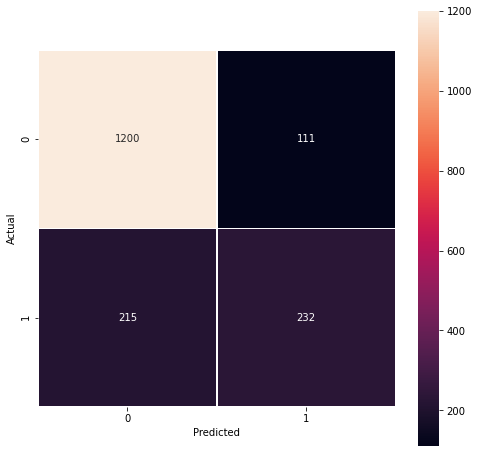

In [36]:
cm = confusion_matrix(y_test, grad_pred_tuned)

f, ax = plt.subplots(figsize=(8, 8))

heatmap = sns.heatmap(cm,
                      square = True,
                      linewidths = .5,
                      annot = True,
                      fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

###### Feature importance figures of Tuned Gradient Boosting, Gradient Boosting and XGboost models are given below

In [37]:
#Feature Importances
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

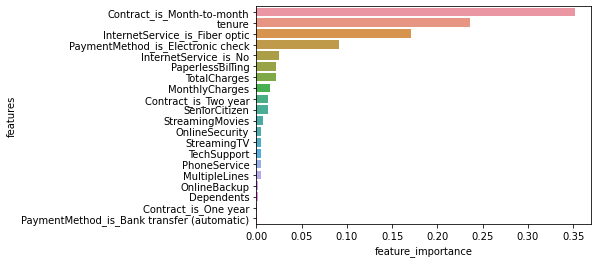

In [38]:
plot_features(X_train.columns, grad_model_tuned.feature_importances_)

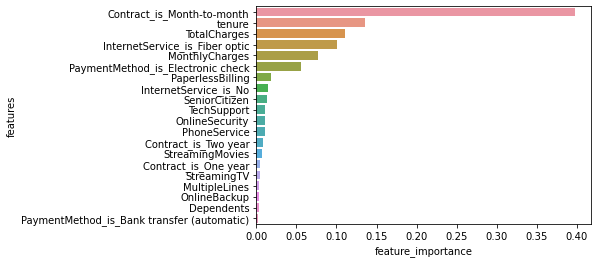

In [39]:
plot_features(X_train.columns, grad_model.feature_importances_)

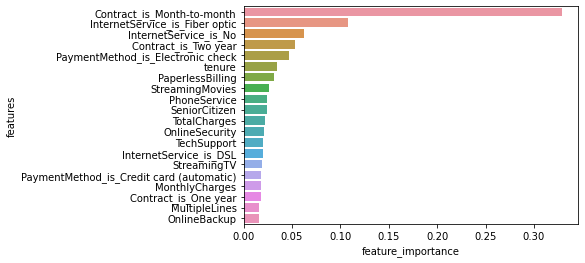

In [40]:
plot_features(X_train.columns, xgboost.feature_importances_)